In [149]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression     
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


import warnings
warnings.filterwarnings('ignore')

In [103]:
data=pd.read_csv('h_train.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [104]:
data.shape

(1168, 81)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [106]:
data.apply(lambda x: len(x.unique()))      

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       107
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [107]:
data.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False         True    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False         True    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1163  False       False     False         True    False   False   True   
1164  False       False     False        False    False   False   True   
1165  False       False     False        False    False   False   True   
1166  False       False     False        False    False   False  False   
1167  False       False     False         True    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False  ...     False    True   True   
1        False        False      False  ...     False    True   True   
2        False        False      False  ...     False    True   True   
3        False        False      False  ...     False    True  False   
4        False        False      False  ...     False    True   True   
...        ...          ...        ...  ...       ...     ...    ...   
1163     False        False      False  ...     False    True  False   
1164     False        False      False  ...     False    True  False   
1165     False        False      False  ...     False    True   True   
1166     False        False      False  ...     False    True  False   
1167     False        False      False  ...     False    True   True   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            True    False   False   False     False          False      False  
1            True    False   False   False     False          False      False  
2            True    False   False   False     False          False      False  
3            True    False   False   False     False          False      False  
4            True    False   False   False     False          False      False  
...           ...      ...     ...     ...       ...            ...        ...  
1163         True    False   False   False     False          False      False  
1164         True    False   False   False     False          False      False  
1165         True    False   False   False     False          False      False  
1166         True    False   False   False     False          False      False  
1167         True    False   False   False     False          False      False  

[1168 rows x 81 columns]

In [108]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

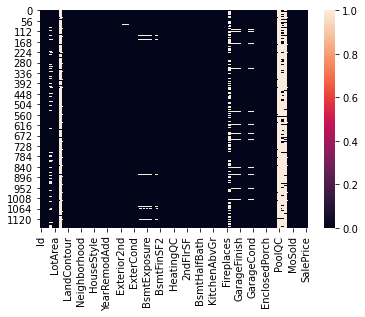

In [109]:
sns.heatmap(data.isnull())

In [110]:
for col in ['MasVnrType','Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [111]:
for col in['LotFrontage','MasVnrArea','GarageYrBlt']:
    data[col].fillna(data[col].mean(),inplace=True)

In [112]:
sns.heatmap(data.isnull())

In [113]:
data.isnull().values.any()      #null values have been removed for test dataset

False

In [114]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.988470   10484.749144     6.104452   
std     416.159877    41.940650    22.437056    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.988470    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.047152   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [115]:
corr=data.corr()

In [116]:
plt.figure(figsize = (30,13))
sns.heatmap(corr,annot = True, cmap = 'coolwarm')

In [117]:
data[:5]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL     70.98847     4928   Pave  Grvl      IR1   
1  889          20       RL     95.00000    15865   Pave  Grvl      IR1   
2  793          60       RL     92.00000     9920   Pave  Grvl      IR1   
3  110          20       RL    105.00000    11751   Pave  Grvl      IR1   
4  422          20       RL     70.98847    16635   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

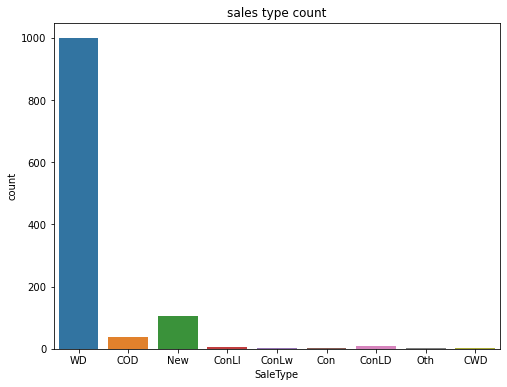

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


In [118]:
plt.subplots(figsize = (8,6))
sns.countplot(x='SaleType',data=data)       
plt.title('sales type count')
plt.show()


print(data['SaleType'].value_counts())

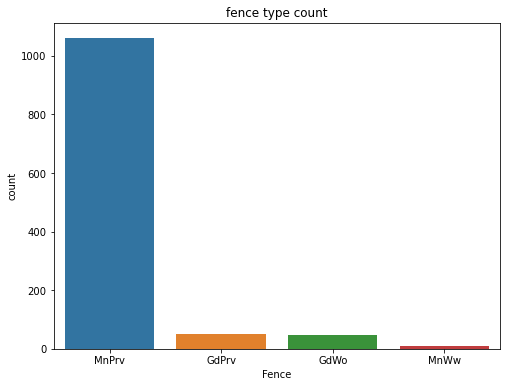

MnPrv    1060
GdPrv      51
GdWo       47
MnWw       10
Name: Fence, dtype: int64


In [119]:
plt.subplots(figsize = (8,6))
sns.countplot(x='Fence',data=data)       
plt.title('fence type count')
plt.show()


print(data['Fence'].value_counts())

In [120]:
plt.subplots(figsize = (8,6))
sns.countplot(x='YrSold',data=data)       
plt.title('year count')
plt.show()


print(data['YrSold'].value_counts())

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


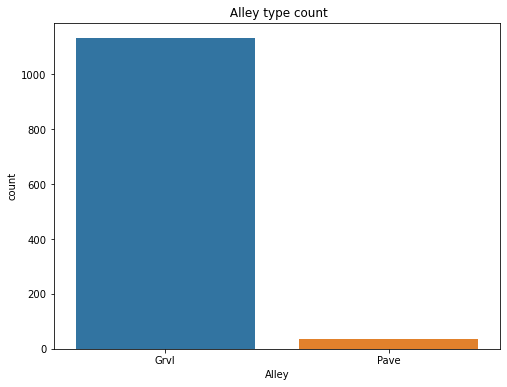

Grvl    1132
Pave      36
Name: Alley, dtype: int64


In [121]:
plt.subplots(figsize = (8,6))
sns.countplot(x='Alley',data=data)       
plt.title(' Alley type count')
plt.show()


print(data['Alley'].value_counts())

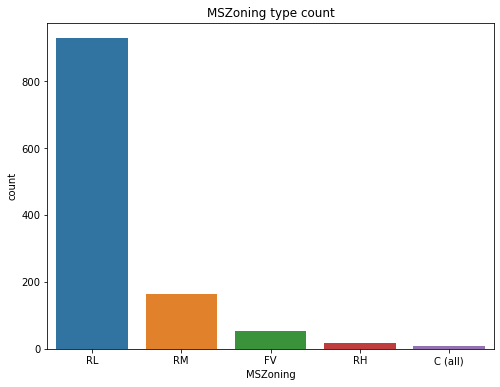

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


In [122]:
plt.subplots(figsize = (8,6))
sns.countplot(x='MSZoning',data=data)       
plt.title('MSZoning type count')
plt.show()


print(data['MSZoning'].value_counts())

In [123]:
plt.subplots(figsize = (8,6))
sns.countplot(x='Utilities',data=data)       
plt.title('Utilities type count')
plt.show()


print(data['Utilities'].value_counts())

AllPub    1168
Name: Utilities, dtype: int64


Text(0.5, 1.0, 'correlation with target variable')

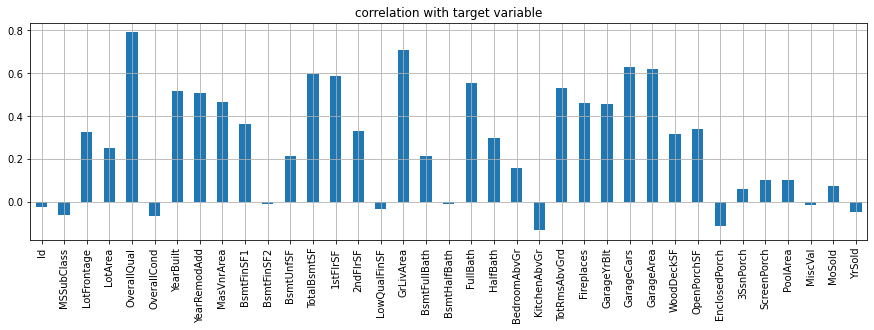

In [124]:
plt.figure(figsize=(15,4))
data.drop('SalePrice',axis=1).corrwith(data['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)                                 #correlation with target variable
plt.title('correlation with target variable')

In [125]:
le=LabelEncoder()

In [126]:
data.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

In [127]:
for col in data.skew().index:
    if col in data.describe().columns:
        if data[col].skew()>0.55:
            data[col]=np.sqrt(data[col])     #treating skewness
        if data[col].skew()<-0.55:
            data[col]=np.cbrt(data[col])

In [128]:
cat_col = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   float64
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   float64
 5   Street         1168 non-null   int32  
 6   Alley          1168 non-null   int32  
 7   LotShape       1168 non-null   int32  
 8   LandContour    1168 non-null   int32  
 9   Utilities      1168 non-null   int32  
 10  LotConfig      1168 non-null   int32  
 11  LandSlope      1168 non-null   int32  
 12  Neighborhood   1168 non-null   int32  
 13  Condition1     1168 non-null   int32  
 14  Condition2     1168 non-null   int32  
 15  BldgType       1168 non-null   int32  
 16  HouseStyle     1168 non-null   int32  
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [130]:
data.describe()

Id   MSSubClass     MSZoning  LotFrontage      LotArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    724.136130     7.086173     3.013699     8.329877    98.604321   
std     416.159877     2.561201     0.633120     1.266094    27.615031   
min       1.000000     4.472136     0.000000     4.582576    36.055513   
25%     360.500000     4.472136     3.000000     7.745967    87.301162   
50%     714.500000     7.071068     3.000000     8.425466    97.583297   
75%    1079.500000     8.366600     3.000000     8.902214   107.310294   
max    1460.000000    13.784049     4.000000    17.691806   405.783193   

            Street        Alley     LotShape  LandContour  Utilities  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000     1168.0  ...   
mean      0.996575     0.030822     1.938356     2.773973        0.0  ...   
std       0.058445     0.172909     1.412262     0.710027        0.0  ...   
min       0.000000     0.000000     0.000000     0.000000        0.0  ...   
25%       1.000000     0.000000     0.000000     3.000000        0.0  ...   
50%       1.000000     0.000000     3.000000     3.000000        0.0  ...   
75%       1.000000     0.000000     3.000000     3.000000        0.0  ...   
max       1.000000     1.000000     3.000000     3.000000        0.0  ...   

          PoolArea       PoolQC        Fence  MiscFeature      MiscVal  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.143406     1.994863     1.880993     1.996575     1.092948   
std       1.852297     0.092426     0.457685     0.092505     6.794119   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     2.000000     2.000000     0.000000   
50%       0.000000     2.000000     2.000000     2.000000     0.000000   
75%       0.000000     2.000000     2.000000     2.000000     0.000000   
max      27.166155     2.000000     3.000000     3.000000   124.498996   

            MoSold       YrSold     SaleType  SaleCondition    SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000  
mean      6.344178  2007.804795     7.465753       3.768836   417.393289  
std       2.686352     1.329738     1.619459       1.112208    85.241242  
min       1.000000  2006.000000     0.000000       0.000000   186.815417  
25%       5.000000  2007.000000     8.000000       4.000000   361.074660  
50%       6.000000  2008.000000     8.000000       4.000000   404.962961  
75%       8.000000  2009.000000     8.000000       4.000000   463.680925  
max      12.000000  2010.000000     8.000000       5.000000   868.907360  

[8 rows x 81 columns]

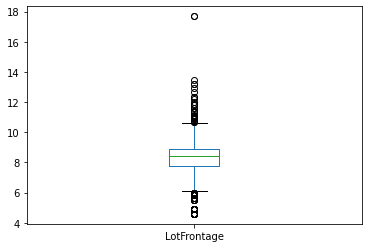

In [131]:
data['LotFrontage'].plot.box()

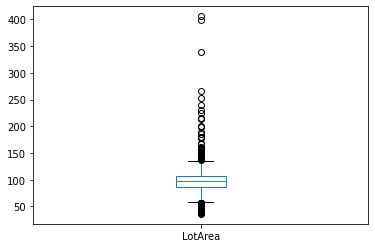

In [132]:
data['LotArea'].plot.box()

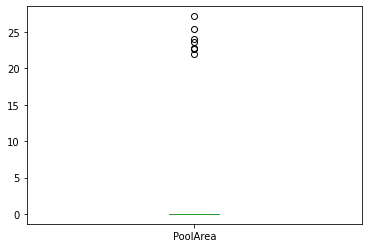

In [133]:
data['PoolArea'].plot.box()

In [134]:
z = np.abs(zscore(data))                         #treaating outlier
z

array([[1.43548658, 1.51098454, 0.02164599, ..., 0.33003329, 0.20793187,
        0.69975461],
       [0.39632483, 1.02106642, 0.02164599, ..., 0.33003329, 0.20793187,
        1.17709262],
       [0.16554544, 0.25772149, 0.02164599, ..., 0.33003329, 0.20793187,
        1.19734931],
       ...,
       [1.26961389, 2.17293387, 0.02164599, ..., 0.33003329, 0.20793187,
        0.37599211],
       [1.66626597, 0.50014657, 4.76211672, ..., 0.33003329, 0.20793187,
        2.55142237],
       [0.25755011, 0.25772149, 0.02164599, ..., 0.33003329, 0.20793187,
        0.12470435]])

In [135]:
threshold = 3

In [136]:
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([11, 22, 36, ..., 41, 64, 65], dtype=int64))


In [137]:
data.shape

(1168, 81)

In [138]:
x = data.drop(columns=['SalePrice'],axis=1)

In [139]:
y = data['SalePrice']

In [140]:
print(x.shape,'\t\t',y.shape)

(1168, 80) 		 (1168,)


In [141]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.33,random_state=42)    

In [143]:
print(x_train.shape,'\t\t',x_test.shape)

(782, 80) 		 (386, 80)


In [144]:
print(y_train.shape,'\t\t',y_test.shape)

(782,) 		 (386,)


In [150]:
lr=LinearRegression()

In [151]:
lr.fit(x_train,y_train)

LinearRegression()

In [152]:
lr.score(x_train,y_train)

0.8912767617309784

In [153]:
pred=lr.predict(x_test)
pred

array([455.36675737, 367.70297653, 289.38188825, 430.65242521,
       323.94291985, 566.40067586, 395.12444479, 390.86919911,
       356.85670472, 477.58079503, 366.45944077, 483.32767812,
       457.8665452 , 483.40086056, 390.82360214, 530.34175054,
       339.48592785, 526.01112571, 369.77462016, 392.11872981,
       404.44603397, 558.78875695, 449.83523003, 382.20276261,
       432.68179753, 347.80833006, 363.82878369, 404.23045022,
       547.98608255, 424.74117066, 424.63886942, 430.89845824,
       351.59065337, 356.33401314, 361.59598189, 474.75350546,
       417.92356974, 334.56816202, 328.06885602, 459.11864915,
       288.16873776, 383.41676462, 451.44408899, 583.74521004,
       299.26253052, 293.33810407, 382.79275375, 354.36753362,
       469.16184814, 481.82567514, 364.65696902, 291.72058072,
       389.08240704, 384.94488559, 304.78856349, 626.13296054,
       374.02190914, 344.94808926, 389.85613843, 485.88023354,
       541.03659302, 412.68089167, 362.55821852, 332.01

In [154]:
print('error')

print("mean absolute error =",mean_absolute_error(y_test,pred))
print("mean squared error =",mean_squared_error(y_test,pred))

print("root mean squared error =",np.sqrt(mean_squared_error(y_test,pred)))

print("r2_score =",r2_score(y_test,pred))

error
mean absolute error = 20.83189951483916
mean squared error = 1138.5888170424732
root mean squared error = 33.74298174498622
r2_score = 0.848124540436639


In [155]:
import joblib


In [156]:
joblib.dump(lr,"House price")       

['House price']